<a href="https://colab.research.google.com/github/UnSrWolo/UnSrWolo/blob/main/RSA_RGB_Histogram_vs_Arousal_Valence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive, files
import os
import matplotlib.pyplot as plt
import numpy as np
import csv
from pandas import *
from scipy.stats import zscore
import matplotlib as mpl
import random

# Mount google drive
drive.mount('/content/drive/', force_remount=False)

# Get the image and data directories
path_threat_nat = "/content/drive/MyDrive/RSA_data/Images/Animate/Nonhuman"
path_threat_man = "/content/drive/MyDrive/RSA_data/Images/Animate/Human"
path_nthreat_nat = "/content/drive/MyDrive/RSA_data/Images/Inanimate/Natural"
path_nthreat_man = "/content/drive/MyDrive/RSA_data/Images/Inanimate/Manmade"
path_dict = "/content/drive/MyDrive/RSA_data/OASIS_dict.csv"
path_arousal = "/content/drive/MyDrive/RSA_data/OASIS_arousal_data.csv"
path_valence = "/content/drive/MyDrive/RSA_data/OASIS_valence_data.csv"



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:

def getRGBfreq(Image):

  """#Takes an image, as a HxWxC array and returns an intensity distribution
     #for each color channel in the form of a length-768 list,
     #255 items per channel."""

  Int_data=[]
  for chan in range(3):
    splitimg = Image[:,:,chan]
    for intens in range(256):
      inten_count = 0
      for x in range(Image.shape[0]):
        for y in range(Image.shape[1]):
          if Image[x,y,chan] == intens :
            inten_count = inten_count+1
      inten_freq = (inten_count / (Image.shape[0]*Image.shape[1]))
      Int_data.append(inten_freq)
  return Int_data


In [ ]:

def getRGBfreq(Image):

  """Takes an image, as a HxWxC array and returns an intensity relative freq distribution
     for each color channel in the form of a length-768 list,
     256 items per channel."""

  Int_data=[]
  for chan in range(3):
    splitimg = np.asarray(Image[:,:,chan])
    for intens in range(256):
      inten_freq = np.count_nonzero(splitimg == intens) / (Image.shape[0]*Image.shape[1])
      Int_data.append(inten_freq)
  return Int_data

def getRGBabsfreq(Image):

  """Takes an image, as a HxWxC array and returns an intensity distribution
     for each color channel in the form of a length-768 list,
     256 items per channel."""

  Int_data=[]
  for chan in range(3):
    splitimg = np.asarray(Image[:,:,chan])
    for intens in range(256):
      inten_freq = np.count_nonzero(splitimg == intens)
      Int_data.append(inten_freq)
  return Int_data


def getImages(path):

  """Just loads the names and picture data in a directory onto a python list."""

  pic_list=[]
  for filename in os.listdir(path):
    pic_details=[]
    f = os.path.join(path, filename)
    pic_details.append(filename)
    picshu = plt.imread(f)
    pic_details.append(picshu)
    pic_list.append(pic_details)
  return pic_list



def batch_getRGBfreq(imageset):

  """Gets the Relative Frequencies for all pictures in a directory.
  Returns a list of lists (for now...)"""

  for i in range(len(imageset)):
    image_data = getRGBfreq(imageset[i][1])

    return image_data





In [ ]:
#I stole these lol

def plot_corr_matrix(rdm, ax=None, show=False):
  """Plot dissimilarity matrix

  Args:
    rdm (numpy array): n_stimuli x n_stimuli representational dissimilarity
      matrix
    ax (matplotlib axes): axes onto which to plot

  Returns:
    nothing

  """
  if ax is None:
    ax = plt.gca()
  image = ax.imshow(rdm, vmin=0.0, vmax=2.0)
  ax.set_xticks([])
  ax.set_yticks([])
  cbar = plt.colorbar(image, ax=ax, label='dissimilarity')
  if show:
    plt.show()


def plot_multiple_rdm(rdm_dict):
  """Draw multiple subplots for each RDM in rdm_dict."""
  fig, axs = plt.subplots(1, len(rdm_dict),
                          figsize=(4 * len(resp_dict), 3.5))

  # Compute RDM's for each set of responses and plot
  for i, (label, rdm) in enumerate(rdm_dict.items()):

    image = plot_corr_matrix(rdm, axs[i])
    axs[i].set_title(label)
  plt.show()


def plot_rdm_rdm_correlations(rdm_sim):
  """Draw a bar plot showing between-RDM correlations."""
  f, ax = plt.subplots()
  ax.bar(rdm_sim.keys(), rdm_sim.values())
  ax.set_xlabel('Deep network model layer')
  ax.set_ylabel('Correlation of model layer RDM\nwith mouse V1 RDM')
  plt.show()


def plot_rdm_rows(ori_list, rdm_dict, rdm_oris):
  """Plot the dissimilarity of response to each stimulus with response to one
  specific stimulus

  Args:
    ori_list (list of float): plot dissimilarity with response to stimulus with
      orientations closest to each value in this list
    rdm_dict (dict): RDM's from which to extract dissimilarities
    rdm_oris (np.ndarray): orientations corresponding to each row/column of RDMs
    in rdm_dict

  """
  n_col = len(ori_list)
  f, axs = plt.subplots(1, n_col, figsize=(4 * n_col, 4), sharey=True)

  # Get index of orientation closest to ori_plot
  for ax, ori_plot in zip(axs, ori_list):
    iori = np.argmin(np.abs(rdm_oris - ori_plot))

    # Plot dissimilarity curves in each RDM
    for label, rdm in rdm_dict.items():
      ax.plot(rdm_oris, rdm[iori, :], label=label)

    # Draw vertical line at stimulus we are plotting dissimilarity w.r.t.
    ax.axvline(rdm_oris[iori], color=".7", zorder=-1)

    # Label axes
    ax.set_title(f'Dissimilarity with response\nto {ori_plot: .0f}$^o$ stimulus')
    ax.set_xlabel('Stimulus orientation ($^o$)')

  axs[0].set_ylabel('Dissimilarity')
  axs[-1].legend(loc="upper left", bbox_to_anchor=(1, 1))
  plt.tight_layout()
  plt.show()



def remove_items(test_list, item):

    # using list comprehension to perform the task
    res = [i for i in test_list if i != item]
    return res


In [ ]:
#First we get the pictures.

NonHuman = getImages(path_anim_nonhum)
Human = getImages(path_anim_hum)
Natural = getImages(path_ina_nat)
Manmade = getImages(path_ina_man)

dirs = [path_anim_nonhum, path_anim_hum, path_ina_nat, path_ina_man]

In [ ]:
# Next we transform each image raw data into a much smaller, intensity
# frequency distribution array

for i in range(len(NonHuman)):
  NonHuman[i][1] = getRGBabsfreq(NonHuman[i][1])
for i in range(len(Human)):
  Human[i][1] = getRGBabsfreq(Human[i][1])
for i in range(len(Natural)):
  Natural[i][1] = getRGBabsfreq(Natural[i][1])
for i in range(len(Manmade)):
  Manmade[i][1] = getRGBabsfreq(Manmade[i][1])




In [ ]:
#We mount our intensity freqs onto a single data structure for easier analysis
datasets=[NonHuman,Human,Natural,Manmade]
RGBfreq=[]
for datas in datasets:
  for i in range(len(datas)):
      RGBfreq.append(np.asarray(datas[i][1]))

RGBfreq = np.asarray(RGBfreq)

In [ ]:
#We read a dictionary so our code knows where to look for the emotion scores

oasis_dictfile = open(path_dict)
oasis_dictcsv = csv.reader(oasis_dictfile)
oasis_dict = {}
for i in oasis_dictcsv:
  oasis_dict[i[1]] = i[0]
#  print(i[1])


oasis_arousalcsv = read_csv(path_arousal)
oasis_valencecsv = read_csv(path_valence)

dirs = [path_anim_nonhum, path_anim_hum, path_ina_nat, path_ina_man]
pics_vals=[]

#We fetch the scores
for dir in dirs:
  for filename in os.listdir(dir):
    pic_vals=[]
    arousal_vals=[]
    valence_vals=[]
    picname = filename.removesuffix('.jpg')
    pic_vals.append(picname)
    pic_key = oasis_dict[picname]
    valence_vals = oasis_valencecsv[pic_key].tolist()
    pic_vals.append(valence_vals)
    arousal_vals = oasis_arousalcsv[pic_key].tolist()
    pic_vals.append(arousal_vals)
    pics_vals.append(pic_vals)

In [ ]:
#We remove all non-numbers from our scores, and we sample 100 (the maximum was 108 anyway) appraisals from
#from arousal and valence so we can calculate zscores comfortably later

for i in range(len(pics_vals)):
  for j in range(1,3):
    templist = [x for x in pics_vals[i][j] if not(isnull(x))]
    random_templist = random.sample(templist, 100)
    pics_vals[i][j] = []
    pics_vals[i][j] = random_templist

In [ ]:
#We prepare our data matrices and transform the data to zscores

valence=[]
for picsh in range(len(pics_vals)):
  valence.append(np.asarray(pics_vals[picsh][1]))

arousal=[]
for picsh in range(len(pics_vals)):
  arousal.append(np.asarray(pics_vals[picsh][2]))

valence = np.asarray(valence)
arousal = np.asarray(arousal)

valencez = zscore(valence, axis=0)
arousalz = zscore(arousal, axis=0)
RGBz = zscore(RGBfreq, axis=0)

In [ ]:
#We calculate RDMs

RDM_val = 1 - (valencez @ valencez.T) / valencez.shape[1]
RDM_aro = 1 - (arousalz @ arousalz.T) / arousalz.shape[1]
RDM_RGB = 1 - (RGBz @ RGBz.T) / RGBz.shape[1]

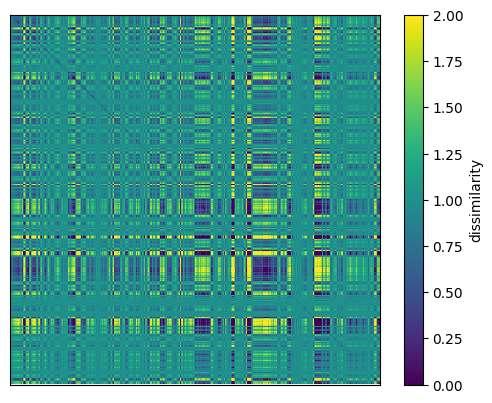

In [ ]:
plot_corr_matrix(RDM_val)

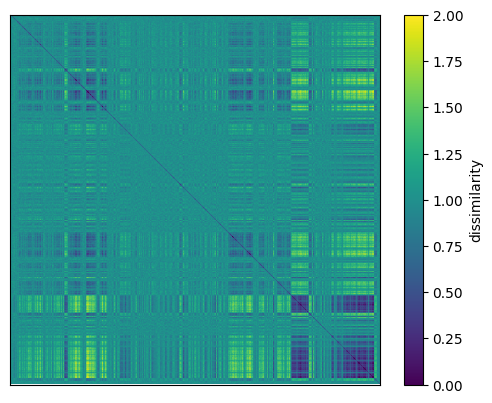

In [ ]:
plot_corr_matrix(RDM_aro)

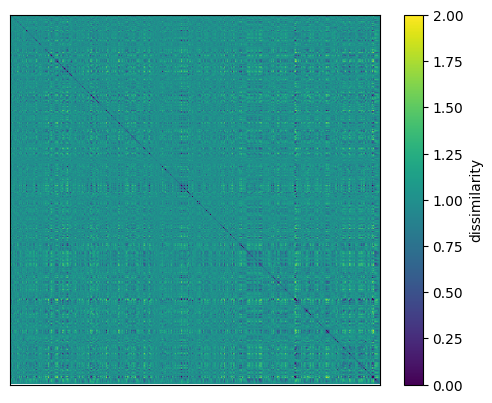

In [ ]:
plot_corr_matrix(RDM_RGB)

In [ ]:
#Now we calculate RDM Correlations

def correlate_rdms(rdm1, rdm2):
  """Correlate off-diagonal elements of two RDM's

  Args:
    rdm1 (np.ndarray): S x S representational dissimilarity matrix
    rdm2 (np.ndarray): S x S representational dissimilarity matrix to
      correlate with rdm1

  Returns:
    float: correlation coefficient between the off-diagonal elements
      of rdm1 and rdm2

  """

  # Extract off-diagonal elements of each RDM
  ioffdiag = np.triu_indices(rdm1.shape[0], k=1)  # indices of off-diagonal elements
  rdm1_offdiag = rdm1[ioffdiag]
  rdm2_offdiag = rdm2[ioffdiag]

  corr_coef = np.corrcoef(rdm1_offdiag, rdm2_offdiag)[0,1]

  return corr_coef

Val_Aro = correlate_rdms(RDM_val, RDM_aro)
Val_RGB = correlate_rdms(RDM_val, RDM_RGB)
Aro_RGB = correlate_rdms(RDM_aro, RDM_RGB)

In [ ]:
print("Valence-Arousal correlation:", Val_Aro)
print("Valence-RGBFreq correlation:", Val_RGB)
print("Arousal-RGBFreq correlation:", Aro_RGB)

Valence-Arousal correlation: 0.00027182804208265084
Valence-RGBFreq correlation: 0.005427890496488219
Arousal-RGBFreq correlation: 0.010251808340703142
